In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os
import glob
import tweepy as tp
import json
from timeit import default_timer as timer

## GATHER

### Extracting Twitter Archive Data

In [2]:
#extracting data of twitter archive data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Extracting Image Prediction Data

In [ ]:
#creating a folder to store the text file
folder_name='image_pred'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [ ]:
#extracting Image Prediction file from weblink and saving to file on local
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
r.status_code, r.headers['content-type']

with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
          file.write(r.content)

In [3]:
#extracting the file to pandas
file_img= pd.read_csv('image_pred/image-predictions.tsv', delimiter='\t')

In [6]:
file_img.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Extracting Dor_Rates Twitter Data

In [ ]:
#extracting data from twitter
ACCESS_TOKEN = '1376450815733288964-H2arKlCNIMX0r4xJ2DjEHZiSnQVUdL'
ACCESS_SECRET = 'tWstbufwHjrNSh4S7YkXlThFXv67JJke17scq9rmDMVWY'
CONSUMER_KEY = 'A6ylJt4qWjhJm96Ehskh3b6SB'
CONSUMER_SECRET = '6xJVDINyKjEBUnT8nr5baYcdJkX37z25gvJCv7MgOgBWZ8ek0D'

auth = tp.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

api = tp.API(auth, wait_on_rate_limit=True)

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.json', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in twitter_archive.tweet_id:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tp.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [4]:
#saving data to file and extracting json data for wrangling
with open('tweet_json.txt') as file:
    tweet_data = []
    for line in file:
        tweet_data.append(json.loads(line))

tweet_data = pd.read_json('tweet_json.json', lines=True)
tweet_data.to_csv('tweet_json.csv', index = False)

In [5]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

## ASSESS

In [7]:
#Asssesing the twitter_enchanced document
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are columns that are not relevant to this project.
* timestamp column is not object, it needs to be a date-time object
* there are about 59 missing expanded urls

In [8]:
twitter_archive[twitter_archive.rating_numerator > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


* Some of the rating numerators do not conform with the ones provided in the text. Due to the text being cut off in Pandas, this evaluation was done in MS Excel.

In [9]:
twitter_archive[twitter_archive.rating_denominator !=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


* some rating_demoninator do not conform with what is provided in the text. Due to the text being cut off in Pandas, this evaluation was done in MS Excel.

In [10]:
twitter_archive[twitter_archive['text'].str.contains("sticker")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1237,712309440758808576,NaN,NaN,2016-03-22 16:06:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Reminder that we made our first set of sticker...,NaN,NaN,NaN,https://twitter.com/stickergrub/status/7099191...,12,10,None,None,None,pupper,None
1265,709901256215666688,NaN,NaN,2016-03-16 00:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",WeRateDogs stickers are here and they're 12/10...,NaN,NaN,NaN,"http://goo.gl/ArWZfi,https://twitter.com/dog_r...",12,10,None,None,None,None,None


* Some of the information provided do not coincide with dog ratings and are instead marketing for dog stickers.

In [11]:
twitter_archive[twitter_archive['text'].str.contains("RT @")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


* Only original tweets are required. Any retweets need to be removed.

In [12]:
twitter_archive.name.value_counts().sort_index()

Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old         

* Some dog names are not accurate. The correct names need to be found and replaced. One of the Dog's name is "O", this is due to the program not capturing apostrophe, this too needs to be corrected.

In [13]:
file_img.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


* Content name under p1, p2 and p3 columns do not follow a consistent standard. All content needs to capitalized, with _ replaced with a space.

In [14]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

* The source data can be extracted between the html tags.

## To be cleaned:

#### Quality

1. Content name under p1, p2 and p3 columns do not follow a consistent standard. All content needs to capitalized, with _ replaced with a space.
2. Only original tweets are required. Any retweets need to be removed.
3. some rating_demoninator do not conform with what is provided in the text. Due to the text being cut off in Pandas, this evaluation was done in MS Excel.
4. Some of the rating numerators do not conform with the ones provided in the text. Due to the text being cut off in Pandas, this evaluation was done in MS Excel.
5. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are columns that are not relevant to this project.
6. timestamp column is not object, it needs to be a date-time object
7. there are about 59 missing expanded urls, which can be removed by dropping these rows.
8. Some dog names are not accurate. The correct names need to be found and replaced. One of the Dog's name is "O", this is due to the program not capturing apostrophe, this too needs to be corrected.
9. Some of the information provided do not coincide with dog ratings and are instead marketing for dog stickers.
10. The source data in Twitter Archive can be extracted from the HTML tags using pandas str. functions.

#### Tidyness

1. dog stages can be outlined as one column to make it tidy.
2. retweet & fav column can be added

## Clean
### Defining

#### Quality:

1. Select all contents under p1, p2 and p3 and replace _ with a space in each of their content, including capitalizing each word.
2. Select all retweets from the twitter_archive table and drop them from the table
3. Select all the text from the twitter archive, extract the original score. From the score, extract the original denominator from the code and compare directly with provided denominator. Update any inconsistencies.
4. Select all the text from the twitter archive, extract the original score. From the score, extract the original numerator from the code and compare directly with provided numerator. Update any inconsistencies.
5. Remove columns  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp from the twitter archive table.
6. Update the relevant timestamp columns to date-time objects.
7. Missing expanded URLs cannot be replaced or imputed, this issue will be present even after cleaning.
8. Run a query to identify dog names that are incorrect. Correct them with the right name, if provided in the text or replace it with None.
9. Identify all text that refer to "sticker" and remove those records from the table.
10. Extract the source data from the table, split the text based on the html tags and extract the original source and add it back to the table.

#### Tidyness:
1. The four categories in Dog stages need to be combined to one column. Perform a function to first identify if 2 or more categories are given for dog, and remove these records. Next sum up of the 4 columns to 1 column, that will provide a single column with relevant categories. For records with empty cells, replace them with NaN
2. Add the retweet & fav columns to the twitter_enchanced table, by using the Join function and verifying them based on tweet ID.

### Code

In [15]:
# creating a copy of the dataframes:
t_archive_copy = twitter_archive.copy()
f_img_copy = file_img.copy()
t_data_copy = tweet_data.copy()

In [16]:
#cleaning the contents of p1,p2,p3 to re
f_img_copy['p1'] = f_img_copy['p1'].str.replace('_', " ").str.title()
f_img_copy['p2'] = f_img_copy['p2'].str.replace('_', " ").str.title()
f_img_copy['p3'] = f_img_copy['p1'].str.replace('_', " ").str.title()

#verifying
f_img_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Welsh Springer Spaniel,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Redbone,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,German Shepherd,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Rhodesian Ridgeback,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Miniature Pinscher,0.154629,True


In [17]:
#retweets are identified by texts starting with "RT @dog_rates:". Dropping all rows with this retweet.
t_archive_copy.drop(t_archive_copy[t_archive_copy.text.str.contains('RT @dog_rates:')].index, inplace=True)

#verifying
t_archive_copy[t_archive_copy.text.str.contains('RT @dog_rates:')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [18]:
# Identifying text content with "stickers" and removing them from the table.
t_archive_copy.drop(t_archive_copy[t_archive_copy.text.str.contains('sticker')].index, inplace=True)

#verifying
t_archive_copy[t_archive_copy.text.str.contains('sticker')]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [19]:
#dropping all unneeded columns in twitter_archive_enhanced table: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp 
t_archive_copy.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

In [20]:
#changing timestamps to datetime objects. Timestamp column is the only one that needs to be changed.
t_archive_copy['timestamp'] = pd.to_datetime(t_archive_copy['timestamp'])

#verifying
t_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [21]:
#extracting dog scores directly from text to compare directly with rating_numerator and rating_denominator
t_archive_copy['score'] = t_archive_copy.text.str.extract('(\d+[/]\d+)')

#Reset index as the columns and rows have removed
t_archive_copy.reset_index(drop=True, inplace=True)

In [22]:
#identifying tweets with multiple dog ratins as each tweet can have one or 2 dog ratings
extracted_score = t_archive_copy.text.str.extractall('(\d+[/]\d+)').reset_index(col_fill='ind')
extracted_score.rename(columns={'level_0':'ind'}, inplace=True)
indexes = extracted_score[extracted_score.duplicated(subset='ind', keep = False)].ind.unique()

#manually identifying multiple dog rating in tweets. Some of them ratings are false
#extracted_score[extracted_score.duplicated(subset='ind', keep = False)]

#correct scores in multiple ratings in dog rating tweets-done manually
right_ind = [54,279,917,1015,1053,1209,1317,1362,1379,1519,1762,1831,1872,1928,2083,2141,2168,2208]

#tweets that multiple dog ratings, as there are 2 dogs in each rating.
repeats = [640,641,857,858,1073,1074,1393,1394,1652,1653,1978,1979,2043,2044]

whole = right_ind + repeats

In [23]:
b =extracted_score[extracted_score.duplicated(subset='ind', keep = False)]

#creating dataframe with correct scores with their respective indexes and multiple ratings.
b2 = b[b.index.isin(whole)]
extracted_score.tail(10)
b2.head()
#t_archive_copy.shape

,ind,match,0
54,53,1,13/10
279,277,1,13/10
640,638,0,12/10
641,638,1,11/10
857,854,0,10/10


In [24]:
#taking another copy of the t_archive_copy, as the cleaning process from here on will edit data.
t2 = t_archive_copy.copy()

#setting the correct scores for ones that have wrongly extracted.
for i in t2.index:
    for x in right_ind:
        if i == b2['ind'][x]:
            print(x)
            print(b2['ind'][x])
            print('Before')
            print(t2['score'][i])
            t2['score'][i] = b2[0][x]
            print('After')
            print(t2['score'][i])
            print("")

54
53
Before
17/10
After
13/10

279
277
Before
960/00


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


After
13/10

917
912
Before
9/11
After
14/10

1015
1009
Before
4/20
After
13/10

1053
1046
Before
50/50
After
11/10

1209
1201
Before
9/10
After
9/10

1317
1307
Before
10/10
After
10/10

1362
1350
Before
5/10
After
10/10

1379
1367
Before
10/10
After
10/10

1519
1504
Before
7/11
After
10/10

1762
1743
Before
5/10
After
8/10

1831
1812
Before
8/10
After
8/10

1872
1852
Before
10/10
After
10/10

1928
1906
Before
11/10
After
11/10

2083
2058
Before
8/10
After
8/10

2141
2114
Before
7/10
After
7/10

2168
2140
Before
10/10
After
10/10

2208
2177
Before
1/2
After
9/10



In [25]:
#adding repeats
for i in t2.index:
    cnt=0
    for x in repeats:
        if i == b2['ind'][x]:
            repeat_cpy = t2.iloc[i].copy()
            repeat_cpy['score']
            cnt+1
            if cnt==1:
                repeat_cpy['score'] = b2['score'][x]
                t2.append(repeat_cpy)

In [26]:
#converting to t2 dataframe to csv, so the repeats can be added manually using repeats list as reference
#this method is chosen for simplicity and less error prone
t2.to_csv('twitter_archive_v2.csv',index = False);

#extracting back dataframe with repeats
twitter_archive_with_repeats = pd.read_csv('twitter_archive_v2_with_rpts.csv')
twitter_archive_copy2 = twitter_archive_with_repeats

Due to the randomness of identifying the actual scores for each tweet from the above, scores will be compare manually and added.

In [27]:
#other retweets are identified by texts starting with "RT @". Dropping all rows with this retweet.
twitter_archive_copy2.drop(twitter_archive_copy2[twitter_archive_copy2.text.str.contains('RT @')].index, inplace=True)

#verifying
twitter_archive_copy2[twitter_archive_copy2.text.str.contains('RT ')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
1130,708400866336894977,11/03/2016 21:15,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",RT if you are as ready for summer as this pup ...,https://vine.co/v/iHFqnjKVbIQ,12,10,None,None,None,None,None,12/10
1495,683515932363329536,3/01/2016 5:11,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",HEY PUP WHAT'S THE PART OF THE HUMAN BODY THAT...,https://vine.co/v/ibvnzrauFuV,11,10,None,None,None,None,None,11/10
1706,675489971617296384,12/12/2015 1:38,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None,10/10
1837,672622327801233409,4/12/2015 3:43,"<a href=""http://twitter.com/download/iphone"" r...",This lil pupper is sad because we haven't foun...,https://twitter.com/dog_rates/status/672622327...,12,10,None,None,None,pupper,None,12/10


In [28]:
#extracting the score in to num erator and denominator. Comparing with already present ratings and changing to the correct ones.

twitter_archive_copy2['num']=twitter_archive_copy2['score'].str.split('/', expand=True)[0]
twitter_archive_copy2['denom']=twitter_archive_copy2['score'].str.split('/', expand=True)[1]
twitter_archive_copy2['denom'] = twitter_archive_copy2['denom'].astype('int64')
twitter_archive_copy2['num'] = twitter_archive_copy2['num'].astype('int64')


#for i in range(twitter_archive_copy2.shape[0]):
#    if twitter_archive_copy2.iloc[i]['num'] != twitter_archive_copy2.iloc[i]['rating_numerator']:
#        print('NUM')
#        print(twitter_archive_copy2.iloc[i]['tweet_id'])
#        print(twitter_archive_copy2.iloc[i]['rating_numerator'])
#        print(twitter_archive_copy2.iloc[i]['num'])
#        twitter_archive_copy2.at[i,'rating_numerator'] = 99# int(twitter_archive_copy2.iloc[i]['num'])
#        print(twitter_archive_copy2.at[i,'rating_numerator'])
#        print(twitter_archive_copy2.index[i])
#        print('')
        
#    if twitter_archive_copy2.iloc[i]['denom'] != twitter_archive_copy2.iloc[i]['rating_denominator']:
#        print('DENOM')
#        print(twitter_archive_copy2.iloc[i]['tweet_id'])
#        print(twitter_archive_copy2.iloc[i]['rating_denominator'])
#        print(twitter_archive_copy2.iloc[i]['denom'])
#        twitter_archive_copy2.at[i,'rating_denominator'] = int(twitter_archive_copy2.iloc[i]['denom'])
#        print(twitter_archive_copy2.at[i,'rating_denominator'])
#        print(twitter_archive_copy2.index[i])
#        print('')

In [29]:
twitter_archive_copy2.drop(columns=['rating_numerator','rating_denominator'],inplace=True)
twitter_archive_copy2.rename(columns ={'num':'rating_numerator', 'denom':'rating_denominator'}, inplace = True)

In [30]:
#verifying
twitter_archive_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2179 entries, 0 to 2203
Data columns (total 13 columns):
tweet_id              2179 non-null int64
timestamp             2179 non-null object
source                2179 non-null object
text                  2179 non-null object
expanded_urls         2121 non-null object
name                  2179 non-null object
doggo                 2179 non-null object
floofer               2179 non-null object
pupper                2179 non-null object
puppo                 2179 non-null object
score                 2179 non-null object
rating_numerator      2179 non-null int64
rating_denominator    2179 non-null int64
dtypes: int64(3), object(10)
memory usage: 238.3+ KB


In [31]:
#converting timestamp to datetime object
twitter_archive_copy2['timestamp'] = pd.to_datetime(twitter_archive_copy2['timestamp'])
twitter_archive_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2179 entries, 0 to 2203
Data columns (total 13 columns):
tweet_id              2179 non-null int64
timestamp             2179 non-null datetime64[ns]
source                2179 non-null object
text                  2179 non-null object
expanded_urls         2121 non-null object
name                  2179 non-null object
doggo                 2179 non-null object
floofer               2179 non-null object
pupper                2179 non-null object
puppo                 2179 non-null object
score                 2179 non-null object
rating_numerator      2179 non-null int64
rating_denominator    2179 non-null int64
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 238.3+ KB


In [32]:
#Updating the dog names, where incorrect dog names are changed with None
twitter_archive_copy2[twitter_archive_copy2.name.str.islower()].text

#setting all none Dog Names to None
old = list(twitter_archive_copy2[twitter_archive_copy2.name.str.islower()].name)

for i in old:
    twitter_archive_copy2['name'].replace({i:None}, inplace = True)


In [33]:
twitter_archive_copy2.info()
test = twitter_archive_copy2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2179 entries, 0 to 2203
Data columns (total 13 columns):
tweet_id              2179 non-null int64
timestamp             2179 non-null datetime64[ns]
source                2179 non-null object
text                  2179 non-null object
expanded_urls         2121 non-null object
name                  2075 non-null object
doggo                 2179 non-null object
floofer               2179 non-null object
pupper                2179 non-null object
puppo                 2179 non-null object
score                 2179 non-null object
rating_numerator      2179 non-null int64
rating_denominator    2179 non-null int64
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 238.3+ KB


In [34]:
#adding the favourite and retweet counts from the twitter data to the twitter archive dataframe
df = test.join(t_data_copy[['favorite_count','retweet_count','id']].set_index('id'), on='tweet_id', how = 'left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2179 entries, 0 to 2203
Data columns (total 15 columns):
tweet_id              2179 non-null int64
timestamp             2179 non-null datetime64[ns]
source                2179 non-null object
text                  2179 non-null object
expanded_urls         2121 non-null object
name                  2075 non-null object
doggo                 2179 non-null object
floofer               2179 non-null object
pupper                2179 non-null object
puppo                 2179 non-null object
score                 2179 non-null object
rating_numerator      2179 non-null int64
rating_denominator    2179 non-null int64
favorite_count        2172 non-null float64
retweet_count         2172 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 272.4+ KB


There are 7 rows with no cell information for the Favouirte and Retweet count. Imputation is not possible as data is not present, so this will have to be null.

In [35]:
#dropping unneeded columns
df.drop(columns=['score'], inplace=True)
df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator,favorite_count,retweet_count
0,892420643555336193,2017-01-08 16:23:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,13,10,34874.0,7319.0
1,892177421306343426,2017-01-08 00:17:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,13,10,30205.0,5466.0
2,891815181378084864,2017-07-31 00:18:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,12,10,22734.0,3607.0
3,891689557279858688,2017-07-30 15:58:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,13,10,38142.0,7508.0
4,891327558926688256,2017-07-29 16:00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,12,10,36410.0,8061.0


In [36]:
#mapping the doggo types to one column, doggo_type
df['doggo'] = df['doggo'].map({'doggo':1, 'None':0})
df['floofer'] = df['floofer'].map({'floofer':1, 'None':0})
df['pupper'] = df['pupper'].map({'pupper':1, 'None':0})
df['puppo'] = df['puppo'].map({'puppo':1, 'None':0})

In [37]:
#trying to identify if more than one dog type is assigned, if so they will have to be removed
df['doggo_type_count'] = df['doggo']+df['floofer']+df['pupper']+df['puppo']

#dropping all rows with more than 1 designation of doggo types
df = df.query('doggo_type_count < 2')  

In [38]:
#merging the different doggo columns to one type
df['doggo'] = df['doggo'].apply(str)
df['floofer'] = df['floofer'].apply(str)
df['pupper'] = df['pupper'].apply(str)
df['puppo'] = df['puppo'].apply(str)

df["doggo"]= df["doggo"].str.replace("1", "doggo")
df["doggo"]= df["doggo"].str.replace("0", "")
df["floofer"]= df["floofer"].str.replace("1", "floofer")
df["floofer"]= df["floofer"].str.replace("0", "")
df["pupper"]= df["pupper"].str.replace("1", "pupper")
df["pupper"]= df["pupper"].str.replace("0", "")
df["puppo"]= df["puppo"].str.replace("1", "puppo")
df["puppo"]= df["puppo"].str.replace("0", "")

df['doggo_type'] = df["doggo"]+df["floofer"]+df["pupper"]+df["puppo"]

In [39]:
#identify empty cells ands replacing with NaN
df=df.replace(r'^\s*$', np.nan, regex=True)
df.drop(columns =['doggo', 'floofer', 'pupper', 'puppo', 'doggo_type_count'],inplace=True)

In [40]:
df['source'] = df['source'].str.split('>', expand=True)[1].str.split('<', expand=True)

In [41]:
df.info()
twitter_archive_copy3 = df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2203
Data columns (total 11 columns):
tweet_id              2167 non-null int64
timestamp             2167 non-null datetime64[ns]
source                2167 non-null object
text                  2167 non-null object
expanded_urls         2109 non-null object
name                  2064 non-null object
rating_numerator      2167 non-null int64
rating_denominator    2167 non-null int64
favorite_count        2160 non-null float64
retweet_count         2160 non-null float64
doggo_type            331 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 203.2+ KB


### Test

In [42]:
#visual verification
twitter_archive_copy3.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating_numerator,rating_denominator,favorite_count,retweet_count,doggo_type
0,892420643555336193,2017-01-08 16:23:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13,10,34874.0,7319.0,NaN
1,892177421306343426,2017-01-08 00:17:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13,10,30205.0,5466.0,NaN
2,891815181378084864,2017-07-31 00:18:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12,10,22734.0,3607.0,NaN
3,891689557279858688,2017-07-30 15:58:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13,10,38142.0,7508.0,NaN
4,891327558926688256,2017-07-29 16:00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12,10,36410.0,8061.0,NaN


In [43]:
twitter_archive_copy3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2203
Data columns (total 11 columns):
tweet_id              2167 non-null int64
timestamp             2167 non-null datetime64[ns]
source                2167 non-null object
text                  2167 non-null object
expanded_urls         2109 non-null object
name                  2064 non-null object
rating_numerator      2167 non-null int64
rating_denominator    2167 non-null int64
favorite_count        2160 non-null float64
retweet_count         2160 non-null float64
doggo_type            331 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 203.2+ KB


In [51]:
#Verifying wrong names are removed
twitter_archive_copy3.name.str.islower().unique()

array([False, None], dtype=object)

In [53]:
#verifying no retweets are present
twitter_archive_copy3[twitter_archive_copy3.text.str.contains('RT ')]

,tweet_id,timestamp,source,text,expanded_urls,name,rating_numerator,rating_denominator,favorite_count,retweet_count,doggo_type
1130,708400866336894977,2016-11-03 21:15:00,Vine - Make a Scene,RT if you are as ready for summer as this pup ...,https://vine.co/v/iHFqnjKVbIQ,None,12,10,15202.0,9506.0,NaN
1495,683515932363329536,2016-03-01 05:11:00,Vine - Make a Scene,HEY PUP WHAT'S THE PART OF THE HUMAN BODY THAT...,https://vine.co/v/ibvnzrauFuV,None,11,10,7011.0,2743.0,NaN
1706,675489971617296384,2015-12-12 01:38:00,Twitter for iPhone,RT until we find this dog. Clearly a cool dog ...,https://twitter.com/dog_rates/status/675489971...,None,10,10,1204.0,550.0,NaN
1837,672622327801233409,2015-04-12 03:43:00,Twitter for iPhone,This lil pupper is sad because we haven't foun...,https://twitter.com/dog_rates/status/672622327...,None,12,10,1192.0,439.0,pupper


In [54]:
#verifying no reords about stickers are present
twitter_archive_copy3[twitter_archive_copy3.text.str.contains('sticker')]

,tweet_id,timestamp,source,text,expanded_urls,name,rating_numerator,rating_denominator,favorite_count,retweet_count,doggo_type


### Saving the cleaned dataframe to CSV file

In [55]:
#saving the final Twitter Arcive Data
twitter_archive_copy3.to_csv('twitter_archive_master.csv')

## Insights

In [57]:
twitter_archive_copy3.source.value_counts()

Twitter for iPhone     2035
Vine - Make a Scene      90
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

* Almost more than 90% of the dog ratings was done through the Twitter App on the user's iPhone. This indicates the users preference to UX is the iPhone app when rating dogs on their twitter feed.

In [58]:
twitter_archive_copy3.doggo_type.value_counts(dropna = False)

NaN        1836
pupper      223
doggo        75
puppo        24
floofer       9
Name: doggo_type, dtype: int64

* Eventhough most tweets did not have specification of the type of dog that they are reffering, we can confirm that the majority of the identified dogs come under the "pupper" category. While the least numbers are from the "floofer" category, indicating that they are not very common in the Dog_Rating user base.

In [59]:
twitter_archive_copy3[twitter_archive_copy3.favorite_count == twitter_archive_copy3.favorite_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,name,rating_numerator,rating_denominator,favorite_count,retweet_count,doggo_type
885,744234799360020481,2016-06-18 18:26:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,None,13,10,149790.0,73855.0,doggo


In [60]:
twitter_archive_copy3[twitter_archive_copy3.retweet_count == twitter_archive_copy3.retweet_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,name,rating_numerator,rating_denominator,favorite_count,retweet_count,doggo_type
885,744234799360020481,2016-06-18 18:26:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,None,13,10,149790.0,73855.0,doggo


* Both max favourtie count and retweet count come from the same tweet, i.e. dog. Eventhough comparing the count of favouruites and retweets is based on how long they were on twitter feed, it is still safe to say that this tweet is popular among the Dog_Rating user base as other tweets with older timestamps did not have this count for both favourites and retweets.

In [61]:
twitter_archive_copy3[twitter_archive_copy3.retweet_count == twitter_archive_copy3.retweet_count.min()]

,tweet_id,timestamp,source,text,expanded_urls,name,rating_numerator,rating_denominator,favorite_count,retweet_count,doggo_type
259,838085839343206401,2017-04-03 17:56:00,Twitter for iPhone,@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,None,15,10,135.0,1.0,NaN


In [62]:
twitter_archive_copy3[twitter_archive_copy3.favorite_count == twitter_archive_copy3.favorite_count.min()]

,tweet_id,timestamp,source,text,expanded_urls,name,rating_numerator,rating_denominator,favorite_count,retweet_count,doggo_type
1139,707983188426153984,2016-10-03 17:35:00,Twitter for iPhone,@serial @MrRoles OH MY GOD I listened to all o...,NaN,None,12,10,49.0,2.0,NaN


* Eventhough the tweet (tweet_id 838085839343206401) is fairly new in terms of timestamp, the retweet number being only 1 is quite low. However, when it is compared to the lowest favourite count, the tweet id 838085839343206401 did fairly better as the tweet id 707983188426153984 has a very low favourite and retweet count while havin

count    12.000000
mean      8.500000
std       3.605551
min       3.000000
25%       5.750000
50%       8.500000
75%      11.250000
max      14.000000
Name: num, dtype: float64

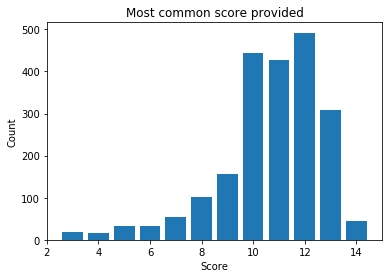

In [63]:
bar = twitter_archive_copy3.rating_numerator.value_counts(sort=True)
score = bar[bar>10]
score = score.reset_index()
score.rename(columns={'index':'num'},inplace=True)
plt.bar(score.num, bar[bar>10])
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Most common score provided')
score.num.describe()



As its evident from the visualization, the most common scores provided to dogs is 12, while the score 10 and 11 follow it up respectively. We also notice that the scores below the median 8 has a count less than 100 compared to the scores above median. This may indicate the twitter owner's reluctance to rate dogs with a lower score in general. Also we can notice, that all scores are integers, and only are very few have recieved a high score of 14.

In this visualization we have only selected the scores that have been provided more than 10 times and have omitted the rest as they are to be considered as outliers, due to the randomness of their scores.

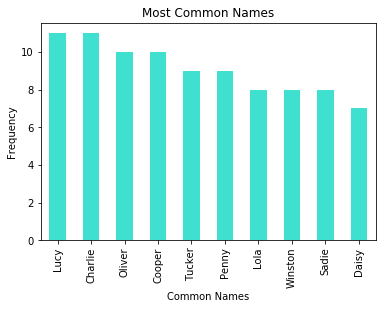

In [64]:
name = twitter_archive_copy3.name.value_counts()[1:11]
#plt.bar(list(name.index), name)
name.plot(kind='bar', color='#40E0D0')
plt.xlabel('Common Names')
plt.ylabel('Frequency')
plt.title('Most Common Names');


In this visualization, we have considered the most common dog names in the Dog_Rating universe. We have considered top 10 most common names, in which Lucy and Charlie came as the most common. If the more information was provided on the gender of the dogs, we can further analyze the most commons names based on gender.